In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read file
history = pd.read_csv("/Users/zhouxueqi/Desktop/Fall2020/doordash/historical_data.csv")
predict = pd.read_csv("/Users/zhouxueqi/Desktop/Fall2020/doordash/predict_data.csv")

In [3]:
# from the info, we know some missing value exsit
history.info()
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
market_id                                       196441 non-null float64
created_at                                      197428 non-null object
actual_delivery_time                            197421 non-null object
store_id                                        197428 non-null int64
store_primary_category                          192668 non-null object
order_protocol                                  196433 non-null float64
total_items                                     197428 non-null int64
subtotal                                        197428 non-null int64
num_distinct_items                              197428 non-null int64
min_item_price                                  197428 non-null int64
max_item_price                                  197428 non-null int64
total_onshift_dashers                           181166 non-null float64
total_busy_dashers                      

In [4]:
combine_train_test = pd.concat([history,predict])
combine_train_test = combine_train_test.drop(["actual_delivery_time","delivery_id","platform"],1)
combine_train_test.info()

/Users/zhouxueqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 252206 entries, 0 to 54777
Data columns (total 15 columns):
created_at                                      252206 non-null object
estimated_order_place_duration                  252206 non-null int64
estimated_store_to_consumer_driving_duration    251669 non-null float64
market_id                                       250969 non-null float64
max_item_price                                  252206 non-null int64
min_item_price                                  252206 non-null int64
num_distinct_items                              252206 non-null int64
order_protocol                                  250928 non-null float64
store_id                                        252206 non-null int64
store_primary_category                          246103 non-null object
subtotal                                        252206 non-null int64
total_busy_dashers                              231311 non-null float64
total_items                             

In [5]:
aa = combine_train_test.isnull().sum()
aa[aa>0].sort_values(ascending=False)

total_outstanding_orders                        20895
total_onshift_dashers                           20895
total_busy_dashers                              20895
store_primary_category                           6103
order_protocol                                   1278
market_id                                        1237
estimated_store_to_consumer_driving_duration      537
dtype: int64

In [6]:
### fillin na value of float with mean, while object value with mode ###
def fillnan(dataset):
    obj_cols = list(dataset.select_dtypes(include=['object']).columns)

    for col in obj_cols:
         dataset[col] = dataset[col].fillna(value = dataset[col].mode()[0])

    num_cols = list(dataset.select_dtypes(include = ['int64']).columns)
    num_cols.append(list(dataset.select_dtypes(include = ['float64']).columns))

    for col in num_cols:
        dataset[col] = dataset[col].fillna(value = dataset[col].median())

fillnan(history)
fillnan(predict)
fillnan(combine_train_test)


In [7]:
history.info()
predict.info()
combine_train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
market_id                                       197428 non-null float64
created_at                                      197428 non-null object
actual_delivery_time                            197428 non-null object
store_id                                        197428 non-null int64
store_primary_category                          197428 non-null object
order_protocol                                  197428 non-null float64
total_items                                     197428 non-null int64
subtotal                                        197428 non-null int64
num_distinct_items                              197428 non-null int64
min_item_price                                  197428 non-null int64
max_item_price                                  197428 non-null int64
total_onshift_dashers                           197428 non-null float64
total_busy_dashers                      

# data preprocessing and explonatary analysis

In [8]:
# calculate the total second between created_at and actual_delivery_time
# name the time difference as "target" add into history data
df = pd.DataFrame()
df['tm_1'] = pd.to_datetime(history['created_at'])
df['tm_2'] = pd.to_datetime(history['actual_delivery_time'])
df['diff_time'] = (df['tm_2'] - df['tm_1']).dt.seconds
history["target"] = df['diff_time']

In [9]:
history.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,target
count,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,2.978813,3530.510272,2.882945,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.164946,41.102230,56.645663,308.560179,545.355314,2862.486709
std,1.521051,2053.496711,1.500000,2.666546,1823.093688,1.630255,522.038648,558.411377,33.143840,30.866801,50.663676,90.139653,219.060510,1181.754164
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,101.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,19.000000,17.000000,19.000000,251.000000,383.000000,2104.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,2660.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,62.000000,59.000000,80.000000,446.000000,702.000000,3381.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,73282.000000


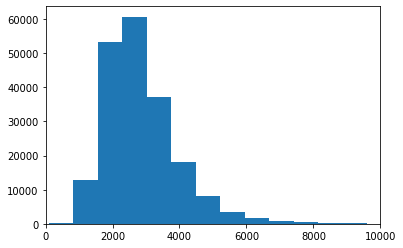

In [10]:
# distribution on actual waiting times in seconds
plt.xlim(0, 10000)
plt.hist(history['target'], bins=100)
plt.show()

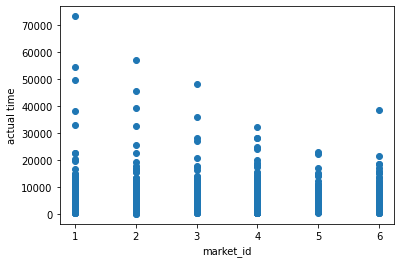

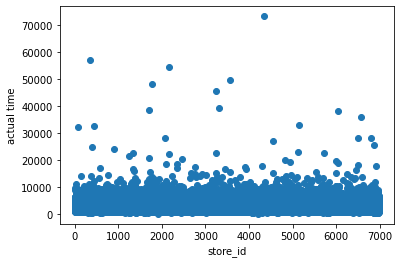

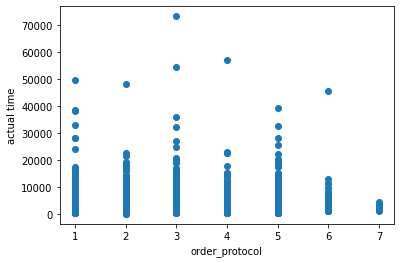

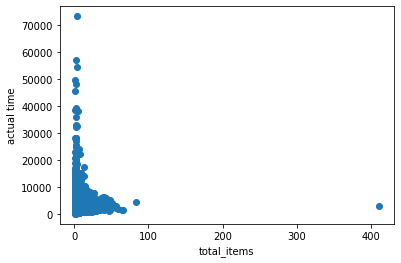

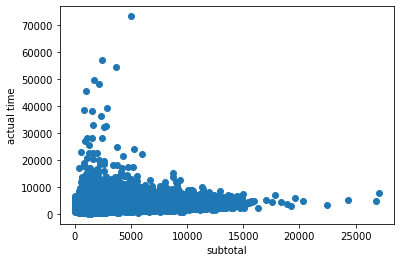

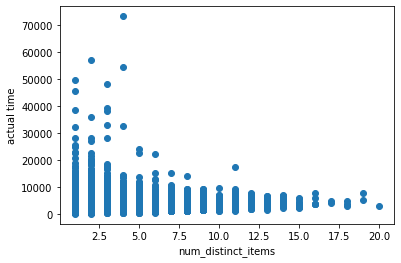

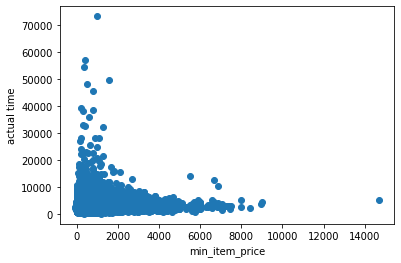

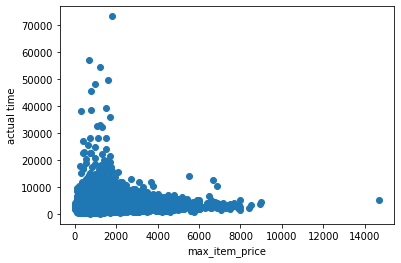

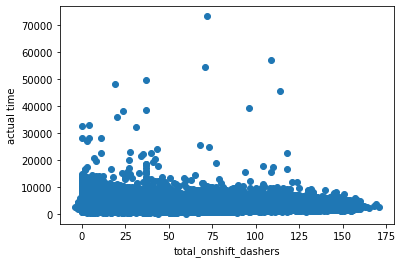

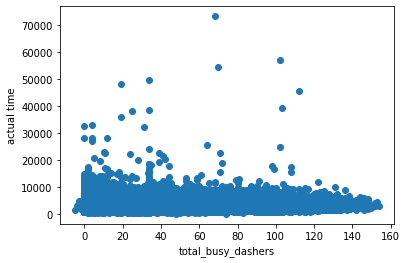

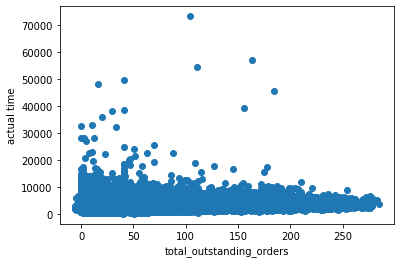

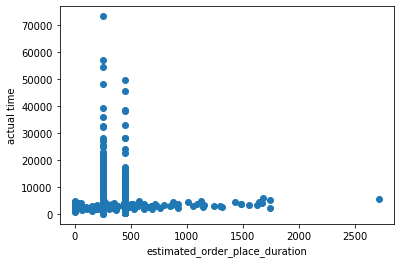

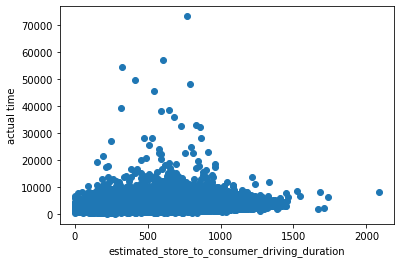

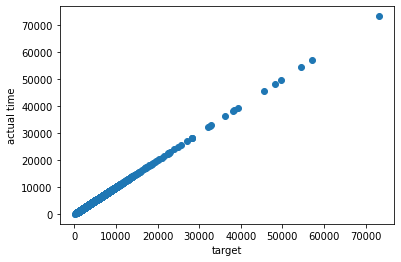

In [11]:
actual_time = history["target"]
cols = history.columns
def draw(x,y):
    plt.plot(history[x],y,'o')
    plt.xlabel(x)
    plt.ylabel('actual time')
    plt.show()

for col in cols:
    if history[col].dtypes in ('float64', 'int64'):
        draw(col, actual_time)

In [12]:
history["market_id"].value_counts()

2.0    55058
4.0    47599
1.0    38037
3.0    24284
5.0    18000
6.0    14450
Name: market_id, dtype: int64

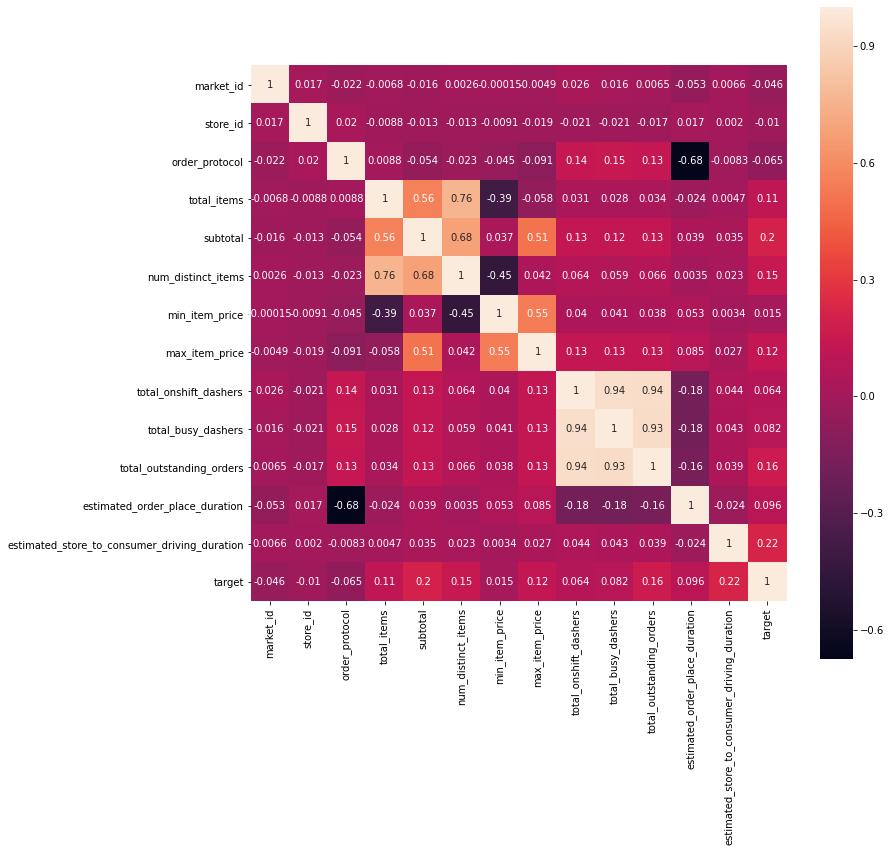

In [13]:
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(history.corr(),vmax=1,square=True,annot=True)

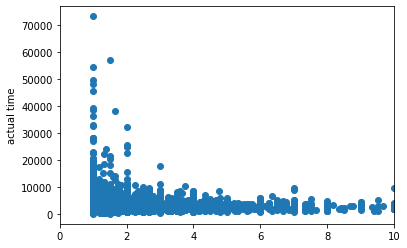

In [14]:
# order variance = total_items/num_distinct_items: the smaller the ratio is the bigger the variety the order is
combine_train_test["order_variance"] = combine_train_test.apply(lambda row: row["total_items"]/row["num_distinct_items"], axis = 1)
combine_train_test["order_variance"].describe()
plt.xlim(0, 10)
plt.plot(combine_train_test["order_variance"][:197428],actual_time,'o')
plt.ylabel('actual time')
plt.show()


In [15]:
combine_train_test["order_variance"].describe()

count    252206.000000
mean          1.196651
std           0.557105
min           1.000000
25%           1.000000
50%           1.000000
75%           1.200000
max          82.200000
Name: order_variance, dtype: float64

In [16]:
combine_train_test["high_order_variance"] = np.where((combine_train_test["total_items"]!=1) & (combine_train_test["order_variance"]==1),1,0)

In [20]:
combine_train_test['hour'] = pd.to_datetime(combine_train_test['created_at']).dt.hour
history['hour'] = pd.to_datetime(history['created_at']).dt.hour

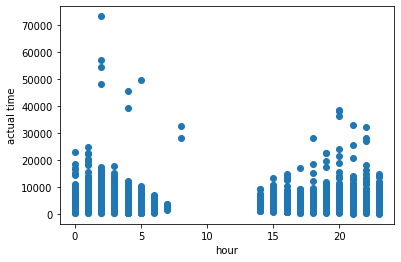

In [21]:
plt.plot(combine_train_test["hour"][:197428],actual_time,'o')
plt.ylabel('actual time')
plt.xlabel('hour')
plt.show()

In [22]:
combine_train_test["hour"].value_counts()

2     46763
1     36198
3     34225
20    19922
4     19601
19    17476
0     16601
21    14652
22    11210
23    10582
5      8929
18     6533
17     4319
16     2691
6      1767
15      673
14       49
7        13
8         2
Name: hour, dtype: int64

In [27]:
history["hour"].value_counts()

2     36976
1     28190
3     27068
20    15560
4     15250
19    13541
0     12669
21    11465
22     8821
23     8163
5      7096
18     5100
17     3413
16     2109
6      1416
15      538
14       40
7        11
8         2
Name: hour, dtype: int64

In [36]:
history.groupby("hour",sort = False)["target"].median().sort_values(ascending = False)

hour
8     30484.5
14     3651.0
2      3073.0
3      2945.0
7      2918.0
15     2848.5
1      2755.5
16     2642.0
19     2589.0
20     2477.5
4      2463.0
0      2457.0
17     2454.0
23     2392.0
22     2336.0
21     2290.0
6      2273.0
18     2262.5
5      2201.0
Name: target, dtype: float64

In [40]:
# according to the previous analysis on busy hour, I created a new variable according to busy hour rank
dic = {"2":1,"1":2,"3":3,"20":4,"4":5,"19":6,"0":7,"21":8,"22":9,"23":10,"5":11,"18":12,"17":13,"16":14,"6":15,"15":16,"14":17,"7":18,"8":19}
rank = []
for i in combine_train_test["hour"]:
    rank.append(dic[str(i)])
combine_train_test["busy_hour_rank"] = rank

In [41]:
combine_train_test["average_price_per_item"] = combine_train_test.apply(lambda row: row["subtotal"]/row["total_items"], axis = 1)
combine_train_test["average_price_per_item"].describe()

count    252206.000000
mean        975.311253
std         521.108605
min           0.000000
25%         648.333333
50%         895.000000
75%        1195.000000
max       29092.000000
Name: average_price_per_item, dtype: float64

0.07374365569707574


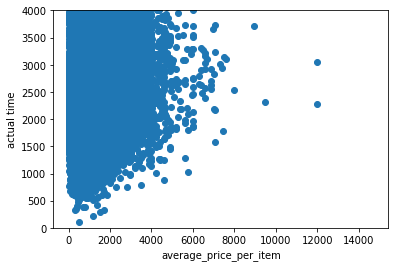

In [42]:
actual = history['target']
estima = history['estimated_order_place_duration']
cor = np.corrcoef(combine_train_test["average_price_per_item"][:197428], actual)[0, 1]
print(cor)
plt.ylim(0, 4000)
plt.plot(combine_train_test["average_price_per_item"][:197428],actual,'o')
plt.ylabel('actual time')
plt.xlabel('average_price_per_item')
plt.show()

# Get Dummies

In [43]:
new = pd.get_dummies(combine_train_test["store_primary_category"],prefix = "store_primary_category")
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252206 entries, 0 to 54777
Data columns (total 74 columns):
store_primary_category_afghan               252206 non-null uint8
store_primary_category_african              252206 non-null uint8
store_primary_category_alcohol              252206 non-null uint8
store_primary_category_alcohol-plus-food    252206 non-null uint8
store_primary_category_american             252206 non-null uint8
store_primary_category_argentine            252206 non-null uint8
store_primary_category_asian                252206 non-null uint8
store_primary_category_barbecue             252206 non-null uint8
store_primary_category_belgian              252206 non-null uint8
store_primary_category_brazilian            252206 non-null uint8
store_primary_category_breakfast            252206 non-null uint8
store_primary_category_british              252206 non-null uint8
store_primary_category_bubble-tea           252206 non-null uint8
store_primary_category_burger   

In [44]:
new2 = pd.get_dummies(combine_train_test["market_id"].astype(str),prefix = "market_id_")
new3 = pd.get_dummies(combine_train_test["order_protocol"].astype(str),prefix = "order_protocol_")

In [45]:
combine_train_test = combine_train_test.drop(["store_primary_category","created_at","market_id","order_protocol"],axis = 1)
combine_train_test = pd.concat([combine_train_test,new,new2,new3],axis = 1)
combine_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252206 entries, 0 to 54777
Columns: 102 entries, estimated_order_place_duration to order_protocol__7.0
dtypes: float64(6), int64(9), uint8(87)
memory usage: 51.7 MB


In [46]:
# ---------------------------------------- try
history.to_csv('/Users/zhouxueqi/Desktop/history.csv')
combine_train_test.to_csv('/Users/zhouxueqi/Desktop/combine_train_test.csv')

# Feature Selection

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [21]:
# feature selection
num_feats = 60
print(combine_train_test.shape)

X = combine_train_test[:197428]
y = history['target']

def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

# chi_selector
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

#put all selection together
feature_name = X.columns.tolist()
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support})

# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 30
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'], ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df) + 1)
# print(feature_selection_df.head(num_feats))
features_by_2models = feature_selection_df['Feature'][:num_feats].tolist()
print(features_by_2models)
print(len(features_by_2models))

feature = combine_train_test.loc[:, features_by_2models]
feature['target'] = history['target']

(252206, 91)
60 selected features
60 selected features
['store_primary_category_vietnamese', 'store_primary_category_vegetarian', 'store_primary_category_turkish', 'store_primary_category_thai', 'store_primary_category_tapas', 'store_primary_category_sushi', 'store_primary_category_steak', 'store_primary_category_spanish', 'store_primary_category_southern', 'store_primary_category_smoothie', 'store_primary_category_sandwich', 'store_primary_category_salad', 'store_primary_category_pizza', 'store_primary_category_persian', 'store_primary_category_other', 'store_primary_category_mexican', 'store_primary_category_mediterranean', 'store_primary_category_malaysian', 'store_primary_category_kosher', 'store_primary_category_korean', 'store_primary_category_japanese', 'store_primary_category_italian', 'store_primary_category_indian', 'store_primary_category_hawaiian', 'store_primary_category_gastropub', 'store_primary_category_filipino', 'store_primary_category_fast', 'store_primary_category_d